# Задача 11

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')

### Аналитическое решение

Уравнение  $\hat H \vec{\psi} = E_0 \vec{\psi}$ - стационарное, значит и решение тоже.

Потенциал осциллятора: 

$$U(x) = \frac{m\omega^2x^2}{2}, \;\; \\
m = 1, \; \omega = 1, \; \hbar = 1$$

Основное состояние: 

$$E_0 = \frac{h\omega}{2} = \frac{1}{2}$$

$$\psi_0(x) = (\frac{m\omega}{\pi \hbar})^{1/4} \exp{(-\frac{m\omega x^2}{2\hbar})} = (\frac{1}{\pi})^{1/4}\exp{(-\frac{x^2}{2})}$$

Уравнение:

$$-\frac{1}{2}\frac{\partial^2}{\partial x^2} + \frac{x^2}{2} = E_0\psi(x)$$

Если переписать вторую производную через конечную разность:

$${\psi}_i'' =\frac{\psi_{i-1} - 2\psi_i + \psi_{i+1}}{h^2}$$

То уравнение в одной точке: 

$$\frac{-\psi_{i-1}}{2h^2} +(\frac{1}{h^2}+\frac{x_i^2}{2})\psi_i + \frac{\psi_{i+1}}{2h^2} = E_0\psi_i$$

В матричном виде $H\vec{\psi} = E_0\vec{\psi}$ матрица $H$ в левой части будет трехдиагональной, следовательно для решения можно будет использовать метод прогонки: 

$$H = 
\begin{pmatrix}
\frac{1}{h^2}+\frac{x_1^2}{2} & \frac{-1}{2h^2} & 0 & ... & 0 & 0 & 0\\ 
\frac{-1}{2h^2} & \frac{1}{h^2}+\frac{x_2^2}{2} & \frac{-1}{2h^2} & ... & 0 & 0 & 0\\ 
... & ... & ... & ... & ... & ... & ...\\ 
0 & 0 & 0 & ... & \frac{-1}{2h^2} & \frac{1}{h^2}+\frac{x_{N-1}^2}{2} & \frac{-1}{2h^2}\\ 
0 & 0 & 0 & ... & 0 & \frac{-1}{2h^2} & \frac{1}{h^2}+\frac{x_N^2}{2}
\end{pmatrix}
$$

Степенной метод находит наибольшее собственное значение, а мы ищем основное состояние - наименьшую энергию - наименьшее собственное значение. Рассмотрим обратную матрицу, так как ее собственные значение будут обратными величинами к собственным значениям исходной матрицы.

"Прямой" метод: 

Если расположить собственные числа в порядке возрастания, т.е. $E_1$ - максимальное, то: 

Возьмем произвольный вектор $\psi^{(0)} = \sum{a_i\psi_i}, \;\; \psi_i$ собственные вектора матрицы.

Тогда итерационный процесс, при котором этот произвольный вектор каждый раз умножается на нашу матрицу $\hat H$ будет сходиться к собственному вектору $\psi_1$, соответсвующему наибольшему собственному значению $E_1$: 

$$\psi^{(k)} = \hat H \psi^{(k-1)} \;\; \rightarrow \;\; \psi_1$$

Но: нам необходимо наименьшее собственное значение. Оно же - наибольшее собственное значение для обратной матрицы $\hat H^{-1}$. Тогда итерационный процесс: 

$$\psi^{(k)} = \hat H^{-1} \psi^{(k-1)}$$

Или: 

$$\hat H \psi^{(k)} = \psi^{(k-1)}$$

Итерационный процесс обратный - "поднимаемся" от последнего - метод прогонки!

Собственное значение в таком случае: 

$$E_0 = \frac{1}{\lambda_{max}} = \frac{\left \|\psi^{[k-1]}  \right \|}{\left \|\psi^{[k]}  \right \|}$$

In [2]:
def TridiagMatrixAlg(a, b, c, d, N):
    y = np.array([0.] * N)
 
    for i in range(1, N):
        xi = a[i] / b[i-1]
        a[i] = 0
        b[i] -= xi * c[i-1]
        d[i] -= xi * d[i-1]

    y[N-1] = d[N-1] / b[N-1]    
    
    for i in range(N-2, -1, -1):
        y[i] = 1 / b[i] * (d[i] - c[i] * y[i+1])    
    
    return y

In [25]:
U = lambda x: 2*x # x**2 / 2

In [26]:
def A(x, N):
    h = x[1] - x[0]
    a = np.array([-1. / (2 * h**2)] * N)
    a[0] = 0
    b = 1. / h ** 2 + U(x)
    c = np.array([-1./(2 * h**2)] * N)
    c[N-1] = 0

    return a, b, c

In [27]:
def Orthogonalization(psi_next, psi_prevs):
    for psi in psi_prevs:
        psi_next -= psi * (np.inner(psi_next, psi)) / np.linalg.norm(psi)

In [28]:
def InverseIterations(psi0, x, N, iteration, levels):
    E = []
    psi = []
    a, b, c = A(x, N)

    for m in range(0, levels):
        psi_next = psi0.copy()
        Orthogonalization(psi_next, psi)
        currError = 1e-4
#         while np.abs(currError - 1e-5) > 0:
#             psi_prev = psi_next
#             psi_next = TridiagMatrixAlg(np.copy(a), np.copy(b), np.copy(c), np.copy(psi_next), N)
#             Orthogonalization(psi_next, psi)
        for k in range(0, iteration):
            psi_prev = psi_next
            psi_next = TridiagMatrixAlg(np.copy(a), np.copy(b), np.copy(c), np.copy(psi_next), N)
            Orthogonalization(psi_next, psi)
    
        E0 = np.linalg.norm(psi_prev) / np.linalg.norm(psi_next)
        E.append(E0)
        psi_next /= np.linalg.norm(psi_next)        
        psi.append(psi_next)
    
    return E, psi

E0: 2.925781738838289
E1: 5.130384929805355
E2: 6.935287921875929


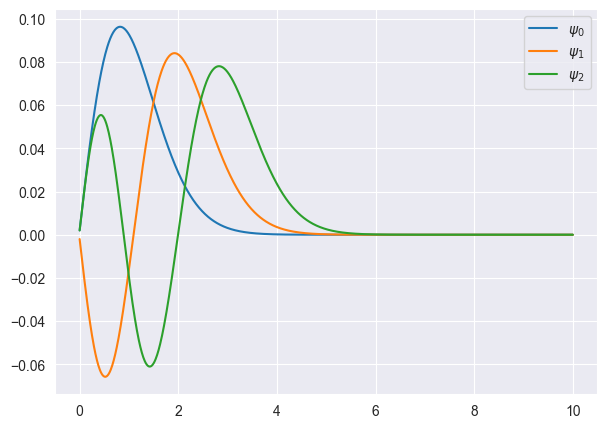

In [29]:
N = 1000        # partion
iteration = 50  # А**(iteration)
(x1, x2) = (0, 10)
levels = 3   # Search sperctrum until this energy level
x = np.linspace(x1, x2, N)  # build grid
y0 = np.linspace(1, 2, N)   # init pseudo solution

E, psi = InverseIterations(y0, x, N, iteration, levels)

plt.figure(figsize=(7, 5), dpi=100)

for i in range(0, levels):
    print(str.format('E{}: {}', i, E[i]))
    plt.plot(x, psi[i], label = f'$\psi_{i}$')
plt.legend()
plt.show()